<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#Get-nonsyn-variants" data-toc-modified-id="Get-nonsyn-variants-4.1">Get nonsyn variants</a></span><ul class="toc-item"><li><span><a href="#CBTTC" data-toc-modified-id="CBTTC-4.1.1">CBTTC</a></span></li><li><span><a href="#DKFZ" data-toc-modified-id="DKFZ-4.1.2">DKFZ</a></span></li><li><span><a href="#TARGET" data-toc-modified-id="TARGET-4.1.3">TARGET</a></span></li></ul></li><li><span><a href="#all-nonsyn-mutated-genes" data-toc-modified-id="all-nonsyn-mutated-genes-4.2">all nonsyn mutated genes</a></span></li></ul></li><li><span><a href="#Strong-binders-in-each-cohort" data-toc-modified-id="Strong-binders-in-each-cohort-5">Strong binders in each cohort</a></span></li><li><span><a href="#Presentation-score" data-toc-modified-id="Presentation-score-6">Presentation score</a></span></li><li><span><a href="#PBR" data-toc-modified-id="PBR-7">PBR</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Minimum-rank" data-toc-modified-id="Minimum-rank-7.0.1">Minimum rank</a></span></li><li><span><a href="#Count-number-of-rank-2" data-toc-modified-id="Count-number-of-rank-2-7.0.2">Count number of rank 2</a></span></li></ul></li></ul></li><li><span><a href="#Deprecated" data-toc-modified-id="Deprecated-8">Deprecated</a></span></li></ul></div>

# Dependencies

In [6]:
options(scipen = 999)

In [7]:
library(dplyr)
library(ggbeeswarm)
library(maftools)
library(ggsignif)

# Functions


In [8]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/Heatmap_functions.R")
source("~/OneDrive - UHN/R_src/Oncoprint_functions.R")

# Paths

In [9]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [10]:
load(file = file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

In [11]:
load(file = paste0(datapath,"snv/total_mut_manifest_estimate.RData"))

In [12]:
mupexifiles <- list.files(paste0(datapath, "Mupexi/"), pattern = "_all.mupexi", recursive = T)

In [13]:
length(mupexifiles)

[1] 549

In [14]:
all.mupexifiles <- lapply(mupexifiles, function(f){read.table(paste0(datapath,"Mupexi/",f), header = TRUE, sep = "\t", stringsAsFactors = F)})

In [15]:
all.mupexi <- do.call("rbind", all.mupexifiles)

In [16]:
head(all.mupexi)

,HLA_allele,Norm_peptide,Norm_MHCrank_EL,Norm_MHCscore_EL,Norm_MHCaffinity,Norm_MHCrank_BA,Norm_MHCscore_BA,Mut_peptide,Mut_MHCrank_EL,Mut_MHCscore_EL,⋯,Cancer_Driver_Gene,Proteome_Peptide_Match,Expression_Level,Mutant_affinity_score,Normal_affinity_score,Expression_score,priority_Score,Norm_MHCbinder,Mut_MHCbinder,sample_id
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,HLA-A23:01,MFIFGVVGNL,3.1003,0.065651,1530.4,2.0909,0.322235,RFIFGVVGNL,1.3960,0.213971,⋯,No,No,-,0.9534695,0.0040640619,1,95,NA,WB,7316-10
2,HLA-C14:03,TIPAVMFIF,3.7203,0.174492,3841.9,6.4026,0.237164,TIPAVRFIF,1.4700,0.365306,⋯,No,No,-,0.9340110,0.0001837961,1,93,NA,NA,7316-10
3,HLA-A03:01,GPLPPPRPMR,1.9251,0.106137,7744.2,6.3183,0.172377,GPLPPPRPLR,1.6858,0.129295,⋯,No,No,-,0.8279261,0.5925458879,1,58,NA,NA,7316-10
4,HLA-C06:02,DVREPPALKY,2.1529,0.094989,17122.1,8.5405,0.099046,DVREPPALQY,1.8401,0.107971,⋯,No,No,-,0.6898675,0.3176700658,1,58,NA,NA,7316-10
5,HLA-B44:03,REPPALKYGI,1.6853,0.060808,9893.2,4.1304,0.149742,REPPALQYGI,1.4515,0.079779,⋯,No,No,-,0.9394884,0.8282819887,1,55,NA,NA,7316-10
6,HLA-B58:02,VREPPALKY,1.3429,0.039176,36248.4,20.1432,0.029726,VREPPALQY,1.2016,0.044444,⋯,No,No,-,0.9818719,0.9639280118,1,51,NA,NA,7316-10


In [17]:
ped_tmb <- total_mut_manifest_estimate[ total_mut_manifest_estimate$group != "TCGA",]

Add a new variable percentage reads for total_mut_manifest_estimate_quanti

In [18]:
ped_tmb$percread <- 8.0947988*exp(ped_tmb$ImmuneScore*0.0006267)

In [19]:
table(ped_tmb$sample_type)


Initial CNS Tumor           Primary     Primary Tumor 
              470               196                98 

In [20]:
ped_tmb_IC <- merge(ped_tmb, metadata_IC[,c("sample_id", "immune_cluster")], by = "sample_id")

In [21]:
dim(ped_tmb)

[1] 764  33

## Get nonsyn variants

### CBTTC

In [22]:
CBTTC_mafsummary <- read.table(file = paste0(datapath, "snv/CBTTC_mafsummary_overlapped_3VAF.txt"),
                        sep = "\t", check.names = F,
                        header = TRUE, stringsAsFactors = FALSE)

In [23]:
dim(CBTTC_mafsummary)

[1] 796  10

In [24]:
mymaf_CBTTC <- read.maf(maf =  paste0(datapath, "snv/CBTTC_maf_overlapped_3VAF.maf"),
                      useAll = TRUE, verbose = FALSE,
                      vc_nonSyn = c("Frame_Shift_Del", "Frame_Shift_Ins", 
                                    "Nonsense_Mutation","Nonstop_Mutation", 
                                    "In_Frame_Del","In_Frame_Ins", 
                                    "Missense_Mutation"))

In [25]:
mymaf_CBTTC@summary

ID,summary,Mean,Median
<chr>,<chr>,<dbl>,<dbl>
NCBI_Build,GRCh38,NA,NA
Center,Mutect2,NA,NA
Samples,842,NA,NA
nGenes,13511,NA,NA
Frame_Shift_Del,845,1.004,0
Frame_Shift_Ins,769,0.913,0
In_Frame_Del,160,0.190,0
In_Frame_Ins,30,0.036,0
Missense_Mutation,50771,60.298,4


In [26]:
CBTTC_data_maf <- mymaf_CBTTC@data

calculate tumour VAF

In [27]:
CBTTC_data_maf$t_VAF <- CBTTC_data_maf$t_alt_count / CBTTC_data_maf$t_depth

In [28]:
summary(CBTTC_data_maf$t_VAF)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03125 0.23913 0.32468 0.31363 0.39216 1.00000 

In [29]:
CBTTC_data_maf$Tumor_Sample_Barcode <- as.character(CBTTC_data_maf$Tumor_Sample_Barcode)

In [30]:
table(CBTTC_data_maf$Variant_Classification)


  Frame_Shift_Del   Frame_Shift_Ins      In_Frame_Del      In_Frame_Ins 
              845               769               160                30 
Missense_Mutation Nonsense_Mutation  Nonstop_Mutation 
            50771              2840                25 

In [31]:
CBTTC_data_maf_sampleid <- merge(CBTTC_mafsummary[,c("sample_id", "Tumor_Sample_Barcode")], 
                                 CBTTC_data_maf, by = "Tumor_Sample_Barcode")

In [32]:
length(unique(CBTTC_data_maf_sampleid$Tumor_Sample_Barcode))

[1] 796

Subset  snv dfs to include only samples in estimate df

In [33]:
CBTTC_data_maf <- CBTTC_data_maf_sampleid[CBTTC_data_maf_sampleid$sample_id %in% ped_tmb_IC$sample_id,]

In [34]:
length(unique(CBTTC_data_maf$Tumor_Sample_Barcode))

[1] 470

In [35]:
CBTTC_data_maf_kb <- CBTTC_data_maf[grepl("oncogenic", CBTTC_data_maf$oncogenic,ignore.case = T),]

### DKFZ

In [36]:
DKFZ_maf <- read.table(file = paste0(datapath, "snv/dkfz_mafKB.maf"),
                        sep = "\t", check.names = F,
                        header = TRUE, comment.char = "",stringsAsFactors = FALSE)

In [37]:
table(DKFZ_maf$variant_classification)


    frameshift deletion    frameshift insertion  nonframeshift deletion 
                    600                     330                     150 
nonframeshift insertion       nonsynonymous SNV                splicing 
                     42                   18871                      59 
               stopgain            stopgain SNV            stoploss SNV 
                     16                    1222                       4 
         synonymous SNV 
                    424 

In [38]:
DKFZ_maf_nsyn <- DKFZ_maf[!DKFZ_maf$variant_classification %in% c("splicing", "unknown", "synonymous SNV"),]

In [39]:
colnames(DKFZ_maf_nsyn)[colnames(DKFZ_maf_nsyn) == "Tumor_Sample_Barcode"] <- "sample_id"

In [40]:
dim(DKFZ_maf)
dim(DKFZ_maf_nsyn)

[1] 21718    17

[1] 21235    17

In [41]:
colnames(DKFZ_maf)[colnames(DKFZ_maf) == "Tumor_Sample_Barcode"] <- "sample_id"

In [42]:
DKFZ_maf_kb <- DKFZ_maf[grepl("oncogenic", DKFZ_maf$oncogenic,
                                                ignore.case = T),]

In [43]:
dim(DKFZ_maf)
dim(DKFZ_maf_kb)

[1] 21718    17

[1] 481  17

### TARGET

In [44]:
mymaf_gdc <- read.maf(maf =  paste0(datapath, "snv/GDC_allmaf_3VAF_fl_dedup_sampleid_KB.maf"),
                      useAll = TRUE, verbose = FALSE,
                      vc_nonSyn = c("Frame_Shift_Del", "Frame_Shift_Ins", 
                                    "Nonsense_Mutation","Nonstop_Mutation", 
                                    "In_Frame_Del","In_Frame_Ins", 
                                    "Missense_Mutation"))

In [45]:
mymaf_gdc_data<- mymaf_gdc@data

In [46]:
length(unique(mymaf_gdc_data$Tumor_Sample_Barcode))

[1] 2749

In [47]:
mymaf_gdc_data$Tumor_Sample_Barcode <- as.character(mymaf_gdc_data$Tumor_Sample_Barcode)

In [48]:
table(mymaf_gdc_data$Variant_Classification)


  Frame_Shift_Del   Frame_Shift_Ins      In_Frame_Del      In_Frame_Ins 
            17243             10161              1306              1752 
Missense_Mutation Nonsense_Mutation  Nonstop_Mutation 
           288342             21973               264 

subset to TARGET data and match with total_mut_manifest_estimate_quanti

In [49]:
mymaf_target_data <- mymaf_gdc_data[grepl("TARGET", mymaf_gdc_data$Tumor_Sample_Barcode),]

In [50]:
length(unique(mymaf_target_data$Tumor_Sample_Barcode))

[1] 131

In [51]:
mymaf_target_data <- mymaf_target_data[mymaf_target_data$Tumor_Sample_Barcode %in% 
                                       ped_tmb_IC$sample_id,]

In [52]:
colnames(mymaf_target_data)[colnames(mymaf_target_data) == "Tumor_Sample_Barcode"] <- "sample_id"

In [53]:
mymaf_target_data_kb <- mymaf_target_data[ grepl("oncogenic", mymaf_target_data$oncogenic,
                                                ignore.case = T),]

In [54]:
colnames(mymaf_target_data_kb)[colnames(mymaf_target_data_kb) == "Tumor_Sample_Barcode"] <- "sample_id"

In [55]:
dim(mymaf_target_data)
dim(mymaf_target_data_kb)

[1] 1888  156

[1]  19 156

In [56]:
dim(CBTTC_data_maf)
dim(CBTTC_data_maf_kb)

[1] 20087   163

[1] 324 163

## all nonsyn mutated genes

In [57]:
dkfz_allmut <- as.data.frame(table(DKFZ_maf$Hugo_Symbol), stringsAsFactors = F)
cbttc_allmut <- as.data.frame(table(CBTTC_data_maf$Hugo_Symbol), stringsAsFactors = F)
target_allmut <- as.data.frame(table(mymaf_target_data$Hugo_Symbol), stringsAsFactors = F)

In [58]:
mutated_genes_all <- c(dkfz_allmut$Var1,cbttc_allmut$Var1,target_allmut$Var1)

In [59]:
allmutated_genes <- mutated_genes_all[!duplicated(mutated_genes_all)]

In [60]:
length(allmutated_genes)

[1] 12100

In [61]:
table(all.mupexi$Mut_MHCbinder)


   SB    WB 
 7591 21680 

# Strong binders in each cohort

In [62]:
table(all.mupexi$Mut_MHCbinder, useNA = "always")


     SB      WB    <NA> 
   7591   21680 1546095 

In [63]:
bindersamples <- all.mupexi[all.mupexi$Mut_MHCbinder == "SB",]

In [64]:
metadata_IC_SB <- metadata_IC[ metadata_IC$sample_id %in% bindersamples$sample_id,]

In [65]:
dim(metadata_IC_SB)

[1] 459  24

In [66]:
tmp <- as.data.frame(table(bindersamples$sample_id), stringsAsFactors = F)

In [67]:
metadata_IC_SB$binders <- NA

for(i in 1:nrow(tmp)){
    metadata_IC_SB$binders[match(tmp$Var1[i],metadata_IC_SB$sample_id)] <- tmp$Freq[i]   
}

In [68]:
mymed <- lapply(unique(metadata_IC_SB$cohort), function(x){
    median(metadata_IC_SB$binders[ metadata_IC_SB$cohort == x])})

names(mymed) <- unique(metadata_IC_SB$cohort)

In [69]:
metadata_IC_SB$cohort <- factor(metadata_IC_SB$cohort,
                             levels = names(mymed[order(unlist(mymed))]))

In [70]:
SB_plot <- ggplot(metadata_IC_SB, aes(x = cohort, y = binders, fill = cohort)) +  
geom_boxplot() + myplot + 
theme(axis.title.y = element_text(size = 25),
      axis.title.x = element_blank(),
      axis.line = element_line(color = "black"),
      axis.text.x = element_text(size = 30, angle = 45, hjust = 1, color = "black"),
      axis.text.y = element_text(size = 30, color = "black"),
     legend.position = "none") +
scale_fill_manual(values = cohort_col) +
scale_y_continuous(trans = "log10") +annotation_logticks(sides = "l")+
labs(y = paste0("Number of strong binding peptides"))

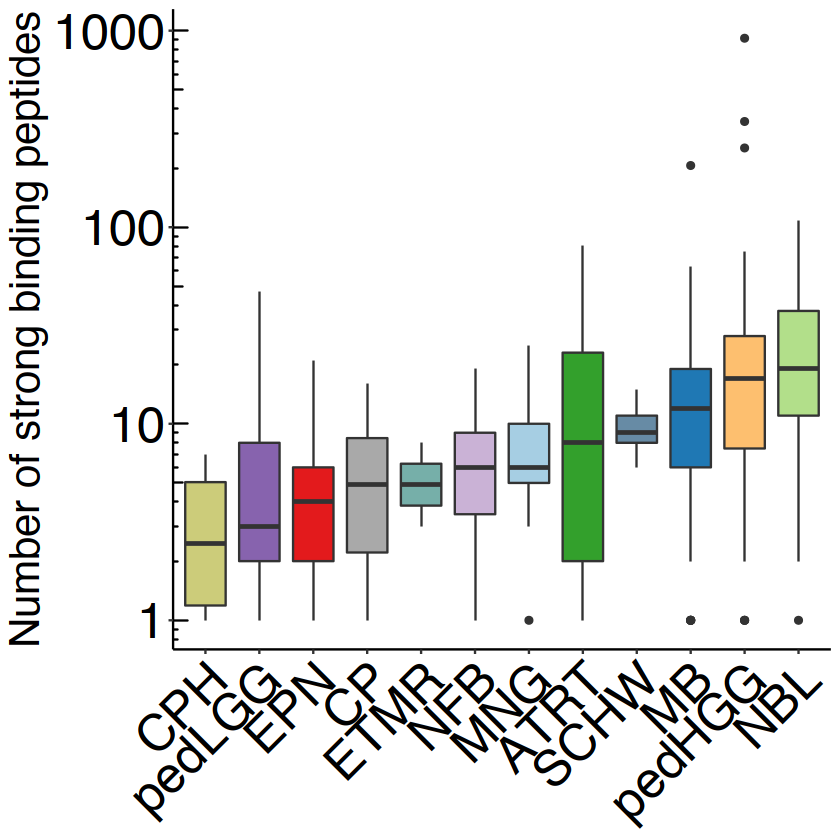

In [71]:
SB_plot

In [72]:
binders_fit <- aov(binders ~ immune_cluster + cohort, metadata_IC_SB)
summary.lm(binders_fit)


Call:
aov(formula = binders ~ immune_cluster + cohort, data = metadata_IC_SB)

Residuals:
   Min     1Q Median     3Q    Max 
-59.71 -10.02  -2.02   4.12 844.12 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    -3.2172    19.8087  -0.162  0.87106   
immune_clusterMyeloid-driven   13.1010     8.0425   1.629  0.10403   
immune_clusterPediatric cold    2.9302     8.2007   0.357  0.72103   
immune_clusterImmune excluded  -0.7832     8.8795  -0.088  0.92975   
cohortpedLGG                    2.1344    20.0371   0.107  0.91521   
cohortEPN                       4.9734    21.2268   0.234  0.81486   
cohortCP                        6.0126    25.0711   0.240  0.81058   
cohortETMR                      7.6437    39.1952   0.195  0.84547   
cohortNFB                       3.1595    26.4388   0.120  0.90493   
cohortMNG                       4.9656    25.0867   0.198  0.84319   
cohortATRT                     15.4064    22.8724   

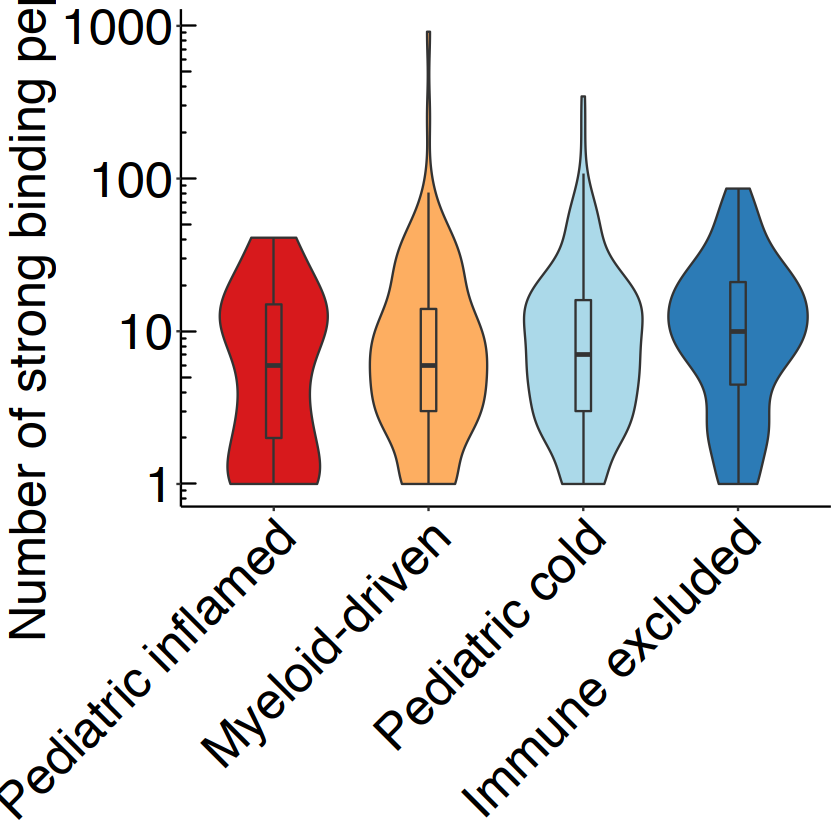

In [73]:
binderplot <- ggplot(data = metadata_IC_SB, aes(x = immune_cluster, y = binders, fill = immune_cluster)) + 
geom_violin() + geom_boxplot(width = 0.1, outlier.colour = NA) + myplot +
theme(axis.title.y = element_text(size = 30),
      axis.title.x = element_blank(),
      axis.line = element_line(color = "black"),
      axis.text.x = element_text(angle = 45, hjust = 1, size = 30, color = "black"),
      axis.text.y = element_text(size = 30, color = "black"),
      plot.title = element_text( hjust = 0.5, size = 30),
     legend.position = "none") +
scale_fill_manual(values = cluster_col) +
scale_y_continuous(trans = "log10") +annotation_logticks(sides = "l")+
labs(y = paste0("Number of strong binding peptides"))

binderplot 

In [74]:
dim(metadata_IC_SB)

[1] 459  25

In [75]:
pdf(file = paste0(plotpath,"Immune_clusters_SB.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE)
binderplot + ggtitle(~underline("pedNST (n = 459)"))
dev.off()

pdf 
  2

In [76]:
hgg <- metadata_IC_SB[ metadata_IC_SB$cohort == "pedHGG",]

In [77]:
pairwise.t.test(metadata_IC_SB$binders[metadata_IC_SB$cohort == "pedHGG"],
metadata_IC_SB$immune_cluster[metadata_IC_SB$cohort == "pedHGG"],
                p.adjust = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  metadata_IC_SB$binders[metadata_IC_SB$cohort == "pedHGG"] and metadata_IC_SB$immune_cluster[metadata_IC_SB$cohort == "pedHGG"] 

                Pediatric inflamed Myeloid-driven Pediatric cold
Myeloid-driven  0.115              -              -             
Pediatric cold  0.806              0.020          -             
Immune excluded 0.976              0.026          0.720         

P value adjustment method: none 

In [78]:
dim(hgg)

[1] 35 25

Warning message in wilcox.test.default(c(1.32221929473392, 1.68124123737559, 1.34242268082221, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1.32221929473392, 1.68124123737559, 1.34242268082221, :
“cannot compute exact p-value with ties”


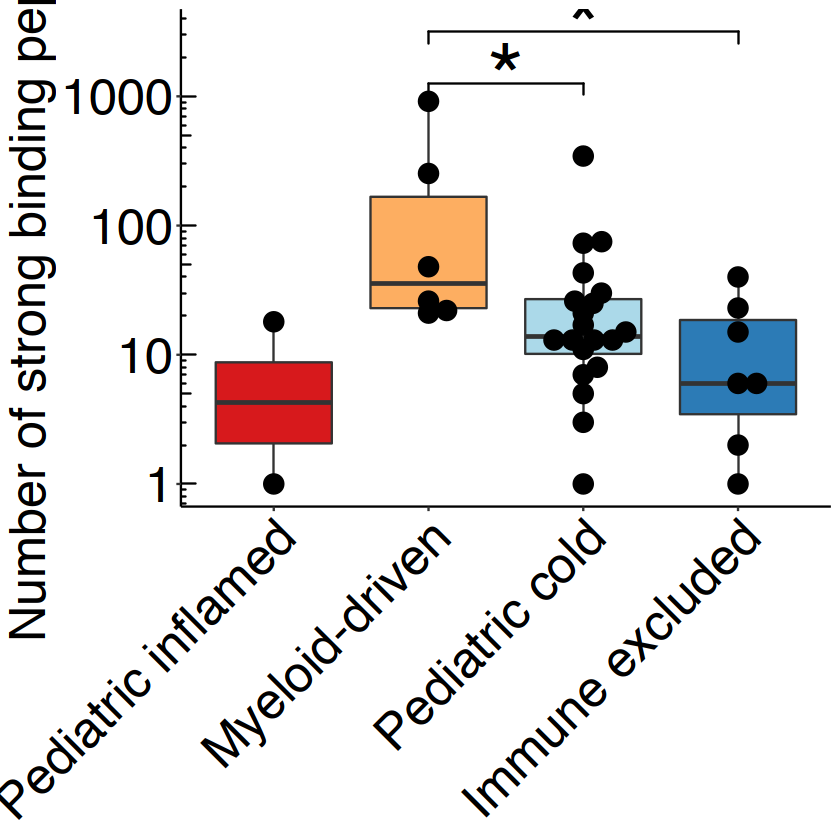

In [79]:
hggplot <- ggplot(data = hgg, aes(x = immune_cluster, y = binders, fill = immune_cluster)) + 
geom_boxplot(outlier.colour = NA) + geom_beeswarm(cex = 3, size = 5) + myplot +
theme(axis.title.y = element_text(size = 30),
      axis.title.x = element_blank(),
      plot.title = element_text(size = 30, hjust = 0.5),
      axis.line = element_line(color = "black"),
      axis.text.x = element_text(angle = 45, hjust = 1,size = 30, color = "black"),
      axis.text.y = element_text(size = 30, color = "black"),
     legend.position = "none") +
scale_fill_manual(values = cluster_col) +
scale_y_continuous(trans = "log10") +annotation_logticks(sides = "l")+
labs(y = paste0("Number of strong binding peptides")) +
geom_signif(comparisons = list(c("Myeloid-driven", "Pediatric cold")), y_position = 3.1,
                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Myeloid-driven", "Immune excluded")), y_position = 3.5,
                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5)

hggplot 

In [80]:
pdf(file = paste0(plotpath,"Immune_clusters_SB_pedHGG.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE)
hggplot + ggtitle(~underline("pedHGG (n = 35)"))
dev.off()

Warning message in wilcox.test.default(c(1.32221929473392, 1.68124123737559, 1.34242268082221, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1.32221929473392, 1.68124123737559, 1.34242268082221, :
“cannot compute exact p-value with ties”


pdf 
  2

# Presentation score

In [81]:
#only one mismatch
onemis_mupexi <- all.mupexi[ all.mupexi$Mismatches == 1,]

In [82]:
table(all.mupexi$Mismatches)


      0       1       2       3       4       5 
 101667 1141300  137512  126593   65213    3081 

In [98]:
?write.table

In [97]:
head(all.mupexi[ all.mupexi$Mismatches == 0,1:25],100)

,HLA_allele,Norm_peptide,Norm_MHCrank_EL,Norm_MHCscore_EL,Norm_MHCaffinity,Norm_MHCrank_BA,Norm_MHCscore_BA,Mut_peptide,Mut_MHCrank_EL,Mut_MHCscore_EL,⋯,Amino_Acid_Change,Allele_Frequency,Mismatches,peptide_position,Chr,Genomic_Position,Protein_position,Mutation_Consequence,Gene_Symbol,Cancer_Driver_Gene
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7381,HLA-B15:02,APPTRGPPP,32.4167,0.000276,37281.8,62.7439,0.027128,APPTRGPPP,32.4167,0.000276,⋯,P/PX,-,0,9:9,X,136874412-136874413,"302,174",F,RBMX,No
7382,HLA-B15:01,APPTRGPPP,67.0000,0.000047,41264.6,86.4839,0.017747,APPTRGPPP,67.0000,0.000047,⋯,P/PX,-,0,9:9,X,136874412-136874413,"302,174",F,RBMX,No
7383,HLA-A11:01,APPTRGPPP,57.0833,0.000046,42153.6,80.1349,0.015777,APPTRGPPP,57.0833,0.000046,⋯,P/PX,-,0,9:9,X,136874412-136874413,"302,174",F,RBMX,No
7384,HLA-C03:03,APPTRGPPP,34.2667,0.000160,37735.9,40.4554,0.026009,APPTRGPPP,34.2667,0.000160,⋯,P/PX,-,0,9:9,X,136874412-136874413,"302,174",F,RBMX,No
7385,HLA-A02:01,APPTRGPPP,65.0000,0.000036,42610.8,81.4870,0.014780,APPTRGPPP,65.0000,0.000036,⋯,P/PX,-,0,9:9,X,136874412-136874413,"302,174",F,RBMX,No
7386,HLA-C08:01,SAPPTRGPPP,53.4615,0.000031,41049.5,44.3978,0.018230,SAPPTRGPPP,53.4615,0.000031,⋯,P/PX,-,0,10:10,X,136874412-136874413,"302,174",F,RBMX,No
7387,HLA-A11:01,AENDKPHDVEI,44.2000,0.000096,41386.6,76.2431,0.017474,AENDKPHDVEI,44.2000,0.000096,⋯,INK/IX,-,0,11:11,20,58440921-58440925,137,F,VAPB,No
7388,HLA-C08:01,APPTRGPPP,44.1667,0.000065,41920.2,48.1296,0.016290,APPTRGPPP,44.1667,0.000065,⋯,P/PX,-,0,9:9,X,136874412-136874413,"302,174",F,RBMX,No
7389,HLA-B15:02,PPTRGPPP,92.5000,0.000003,46658.9,96.5796,0.006392,PPTRGPPP,92.5000,0.000003,⋯,P/PX,-,0,8:8,X,136874412-136874413,"302,174",F,RBMX,No


In [159]:
Listofpatients_numberof2 <- list()

for(p in unique(onemis_mupexi$sample_id)){

    mysample <- onemis_mupexi[ onemis_mupexi$sample_id == p,]
    
    mysample$HLA_residue <- paste(mysample$HLA_allele, mysample$Amino_Acid_Change, sep = "-")    
    
    mygenes <- unique(mysample$Gene_Symbol)
    myres <- unique(mysample$Amino_Acid_Change)
    myhla <- unique(mysample$HLA_allele)
    
    hla_res <- as.vector(sapply(unique(mysample$HLA_allele), function(x) paste(x,unique(mysample$Amino_Acid_Change), sep = "-" )))
                                
    gene_reshlamat <- matrix(nrow = length(mygenes), ncol = length(hla_res),
                             dimnames = list(mygenes, hla_res))
                                
    for(r in colnames(gene_reshlamat)){
        
    hlares <- mysample[ mysample$HLA_residue == r,]
    for(g in unique(hlares$Gene_Symbol)){
        myresmygen <- hlares[ hlares$Gene_Symbol == g,]
        lessthan2 <- sum(myresmygen$Mut_MHCrank_BA < 2)
        BestRank <- lessthan2
        gene_reshlamat[g,r] <- BestRank
    } 
                
    }
                                
    Listofpatients_numberof2[length(Listofpatients_numberof2) + 1] <- list(gene_reshlamat)
                            
                                }
    
names(Listofpatients_numberof2) <- unique(onemis_mupexi$sample_id)

In [160]:
save(Listofpatients_numberof2, file = paste0(datapath, "Mupexi/Listofpatients_count2.RData"))

In [165]:
Listofpatients_numberof2[3]

,HLA-C04:01-G/R,HLA-C04:01-V/I,HLA-A68:01-G/R,HLA-A68:01-V/I,HLA-B55:01-G/R,HLA-B55:01-V/I,HLA-C03:03-G/R,HLA-C03:03-V/I,HLA-B35:02-G/R,HLA-B35:02-V/I,HLA-A26:01-G/R,HLA-A26:01-V/I
CTNNB1,0,NA,0,NA,0,NA,0,NA,0,NA,0,NA
AHNAK2,NA,0,NA,0,NA,0,NA,2,NA,0,NA,0


In [162]:
Listofpatients_minRank <- list()

for(p in unique(onemis_mupexi$sample_id)){

    mysample <- onemis_mupexi[ onemis_mupexi$sample_id == p,]
    
    mysample$HLA_residue <- paste(mysample$HLA_allele, mysample$Amino_Acid_Change, sep = "-")    
    
    mygenes <- unique(mysample$Gene_Symbol)
    myres <- unique(mysample$Amino_Acid_Change)
    myhla <- unique(mysample$HLA_allele)
    
    hla_res <- as.vector(sapply(unique(mysample$HLA_allele), function(x) paste(x,unique(mysample$Amino_Acid_Change), sep = "-" )))
                                
    gene_reshlamat <- matrix(nrow = length(mygenes), ncol = length(hla_res),
                             dimnames = list(mygenes, hla_res))
                                
    for(r in colnames(gene_reshlamat)){
        
    hlares <- mysample[ mysample$HLA_residue == r,]
    for(g in unique(hlares$Gene_Symbol)){
        myresmygen <- hlares[ hlares$Gene_Symbol == g,]
        summarytab <- summary(myresmygen$Mut_MHCrank_BA)
        BestRank <- min(summarytab)
        gene_reshlamat[g,r] <- BestRank
    } 
                
    }
                                
    Listofpatients_minRank[length(Listofpatients_minRank) + 1] <- list(gene_reshlamat)
                                }
    
names(Listofpatients_minRank) <- unique(onemis_mupexi$sample_id)

In [163]:
save(Listofpatients_minRank, file = paste0(datapath, "Mupexi/Listofpatients_minRank.RData"))

In [164]:
Listofpatients_minRank[3]

,HLA-C04:01-G/R,HLA-C04:01-V/I,HLA-A68:01-G/R,HLA-A68:01-V/I,HLA-B55:01-G/R,HLA-B55:01-V/I,HLA-C03:03-G/R,HLA-C03:03-V/I,HLA-B35:02-G/R,HLA-B35:02-V/I,HLA-A26:01-G/R,HLA-A26:01-V/I
CTNNB1,2.0276,NA,6.2125,NA,3.8436,NA,9.2932,NA,11.1415,NA,9.7442,NA
AHNAK2,NA,3.1029,NA,14.0262,NA,9.3076,NA,0.7069,NA,3.412,NA,7.8231


# PBR

### Minimum rank

In [243]:
load(file = paste0(datapath, "Mupexi/Listofpatients_minRank.RData"))

Make a sample x Gene matrix to hold PBR

In [244]:
pbrmat <- matrix(nrow = length(unique(all.mupexi$sample_id)), 
                 ncol = length(unique(all.mupexi$Gene_Symbol)),
                 dimnames = list(
                 unique(all.mupexi$sample_id),
                 unique(all.mupexi$Gene_Symbol)))

In [245]:
for(s in rownames(pbrmat)){
    mypt <- Listofpatients_minRank[[s]]
    bestGene <- rownames(which(mypt == min(mypt, na.rm = T), arr.ind = TRUE))
    bestRank <- min(mypt, na.rm = T)
    pbrmat[s,bestGene] <- bestRank
}

In [251]:
rownames(which(Listofpatients_minRank[[3]] == min(Listofpatients_minRank[[3]], na.rm = T), arr.ind = TRUE))

[1] "AHNAK2"

In [246]:
Listofpatients_minRank[3]

,HLA-C04:01-G/R,HLA-C04:01-V/I,HLA-A68:01-G/R,HLA-A68:01-V/I,HLA-B55:01-G/R,HLA-B55:01-V/I,HLA-C03:03-G/R,HLA-C03:03-V/I,HLA-B35:02-G/R,HLA-B35:02-V/I,HLA-A26:01-G/R,HLA-A26:01-V/I
CTNNB1,2.0276,NA,6.2125,NA,3.8436,NA,9.2932,NA,11.1415,NA,9.7442,NA
AHNAK2,NA,3.1029,NA,14.0262,NA,9.3076,NA,0.7069,NA,3.412,NA,7.8231


In [253]:
pbrmat[1:10, 1:10]

,PTGER4,COQ10A,ENTPD2,UTP23,SLC2A13,ATP8B2,SLC44A5,IGDCC3,IRF2BPL,C12orf45
7316-10,NA,0.0291,NA,NA,NA,NA,NA,NA,NA,NA
7316-101,NA,NA,NA,NA,0.082,NA,NA,NA,NA,NA
7316-1075,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7316-1077,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7316-1078,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7316-1081,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7316-1082,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7316-1083,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7316-1084,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7316-1085,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [174]:
dim(pbrmat)

[1]  549 4038

In [175]:
pbrmat <- pbrmat[, colnames(pbrmat) %in% allmutated_genes]

In [176]:
dim(pbrmat)

[1]  549 4000

In [177]:
metadata_IC_subset <- metadata_IC[metadata_IC$sample_id %in% rownames(pbrmat),]

In [178]:
dim(metadata_IC_subset)

[1] 543  24

In [179]:
metadata_IC_subset <- metadata_IC_subset[order(metadata_IC_subset$immune_cluster),]

In [180]:
pbrmat <- pbrmat[metadata_IC_subset$sample_id,]

In [181]:
pbrmat[1:10,1:10]

,PTGER4,COQ10A,ENTPD2,UTP23,SLC2A13,ATP8B2,SLC44A5,IGDCC3,IRF2BPL,C12orf45
TARGET-30-PAIPGU-01A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TARGET-30-PALETP-01A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TARGET-30-PALTEG-01A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TARGET-30-PANKFE-01A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TARGET-30-PANXJL-01A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TARGET-30-PAPEFE-01A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TARGET-30-PAPUWY-01A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TARGET-30-PAPVXS-01A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TARGET-30-PARDIW-01A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TARGET-30-PARSBI-01A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [182]:
pbrs <- apply(pbrmat, 1, function(x) min(x, na.rm = T))

Warning message in min(x, na.rm = T):
“no non-missing arguments to min; returning Inf”
Warning message in min(x, na.rm = T):
“no non-missing arguments to min; returning Inf”
Warning message in min(x, na.rm = T):
“no non-missing arguments to min; returning Inf”
Warning message in min(x, na.rm = T):
“no non-missing arguments to min; returning Inf”


In [183]:
head(pbrs)

TARGET-30-PAIPGU-01A TARGET-30-PALETP-01A TARGET-30-PALTEG-01A 
              0.0145               0.0559               0.0290 
TARGET-30-PANKFE-01A TARGET-30-PANXJL-01A TARGET-30-PAPEFE-01A 
              0.3373               0.0257               0.0076

In [184]:
metadata_IC_subset_pbr <- cbind(metadata_IC_subset, pbrs)

In [185]:
metadata_IC_subset_pbr <- metadata_IC_subset_pbr[ metadata_IC_subset_pbr$pbrs != Inf,]

In [186]:
fit_pbrs <- aov(pbrs ~ immune_cluster + cohort, metadata_IC_subset_pbr)
summary.lm(fit_pbrs)


Call:
aov(formula = pbrs ~ immune_cluster + cohort, data = metadata_IC_subset_pbr)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7374 -0.5691 -0.1526  0.0279 12.2519 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)  
(Intercept)                    0.74562    0.34346   2.171   0.0304 *
immune_clusterMyeloid-driven  -0.21594    0.20441  -1.056   0.2913  
immune_clusterPediatric cold  -0.18633    0.20842  -0.894   0.3717  
immune_clusterImmune excluded -0.02284    0.23064  -0.099   0.9211  
cohortCP                      -0.43374    0.53224  -0.815   0.4155  
cohortCPH                      0.37866    0.45850   0.826   0.4093  
cohortEPN                      0.17471    0.35404   0.493   0.6219  
cohortETMR                    -0.58209    0.98291  -0.592   0.5540  
cohortMB                      -0.54354    0.33574  -1.619   0.1061  
cohortMNG                     -0.29436    0.51730  -0.569   0.5696  
cohortNBL                     -0.56171    0.3266

In [187]:
tapply(metadata_IC_subset_pbr$pbrs,
       metadata_IC_subset_pbr$immune_cluster, 
       summary)

$`Pediatric inflamed`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00750  0.03207  0.18225  0.74528  0.48883 11.80910 

$`Myeloid-driven`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00440 0.02525 0.10480 0.49581 0.35750 7.04310 

$`Pediatric cold`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0056  0.0185  0.0739  0.4315  0.2891 12.9428 

$`Immune excluded`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00590  0.01915  0.04560  0.35868  0.16755 11.64050 


### Count number of rank 2

In [188]:
load(file = paste0(datapath, "Mupexi/Listofpatients_count2.RData"))

Make a sample x Gene matrix to hold PBR

In [189]:
pbrmat <- matrix(nrow = length(unique(all.mupexi$sample_id)), 
                 ncol = length(unique(all.mupexi$Gene_Symbol)),
                 dimnames = list(
                 unique(all.mupexi$sample_id),
                 unique(all.mupexi$Gene_Symbol)))

In [190]:
for(s in rownames(pbrmat)){
    mypt <- Listofpatients_numberof2[[s]]
    bestGene <- rownames(which(mypt == max(mypt, na.rm = T), arr.ind = TRUE))
    bestRank <- max(mypt, na.rm = T)
    pbrmat[s,bestGene] <- bestRank
}

In [191]:
pbrmat <- pbrmat[, colnames(pbrmat) %in% allmutated_genes]

In [192]:
dim(pbrmat)

[1]  549 4000

In [193]:
metadata_IC_subset <- metadata_IC[metadata_IC$sample_id %in% rownames(pbrmat),]

In [194]:
dim(metadata_IC_subset)

[1] 543  24

In [195]:
metadata_IC_subset <- metadata_IC_subset[order(metadata_IC_subset$immune_cluster),]

In [196]:
pbrmat <- pbrmat[metadata_IC_subset$sample_id,]

In [197]:
pbrs <- apply(pbrmat, 1, function(x) max(x, na.rm = T))

Warning message in max(x, na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(x, na.rm = T):
“no non-missing arguments to max; returning -Inf”


In [198]:
head(pbrs)

TARGET-30-PAIPGU-01A TARGET-30-PALETP-01A TARGET-30-PALTEG-01A 
                   8                    6                    5 
TARGET-30-PANKFE-01A TARGET-30-PANXJL-01A TARGET-30-PAPEFE-01A 
                   2                    7                    5

In [199]:
metadata_IC_subset_pbr <- cbind(metadata_IC_subset, pbrs)

In [200]:
metadata_IC_subset_pbr <- metadata_IC_subset_pbr[ metadata_IC_subset_pbr$pbrs != -Inf,]

In [201]:
tapply(metadata_IC_subset_pbr$pbrs,
       metadata_IC_subset_pbr$immune_cluster, 
       summary)

$`Pediatric inflamed`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   3.922   6.000  10.000 

$`Myeloid-driven`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   4.346   6.000  12.000 

$`Pediatric cold`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   4.000   4.792   7.000  17.000 

$`Immune excluded`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   5.000   5.284   7.000  19.000 


In [204]:
pairwise.t.test(metadata_IC_subset_pbr$pbrs[ metadata_IC_subset_pbr$cohort != "NBL"],
                metadata_IC_subset_pbr$immune_cluster[ metadata_IC_subset_pbr$cohort != "NBL"],
                p.adjust = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  metadata_IC_subset_pbr$pbrs[metadata_IC_subset_pbr$cohort != "NBL"] and metadata_IC_subset_pbr$immune_cluster[metadata_IC_subset_pbr$cohort != "NBL"] 

                Pediatric inflamed Myeloid-driven Pediatric cold
Myeloid-driven  0.2179             -              -             
Pediatric cold  0.0038             0.0193         -             
Immune excluded 0.0011             0.0055         0.3515        

P value adjustment method: none 

In [205]:
fit_pbrs <- aov(pbrs ~ immune_cluster + cohort, metadata_IC_subset_pbr)
summary.lm(fit_pbrs)


Call:
aov(formula = pbrs ~ immune_cluster + cohort, data = metadata_IC_subset_pbr)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6720 -1.7447 -0.4384  1.4443 13.1331 

Coefficients:
                              Estimate Std. Error t value    Pr(>|t|)    
(Intercept)                     3.4638     0.6663   5.199 0.000000289 ***
immune_clusterMyeloid-driven    0.7328     0.3967   1.847    0.065283 .  
immune_clusterPediatric cold    0.9218     0.4043   2.280    0.023020 *  
immune_clusterImmune excluded   0.4992     0.4485   1.113    0.266283    
cohortCP                        0.6178     0.9967   0.620    0.535623    
cohortCPH                      -1.8746     0.8894  -2.108    0.035528 *  
cohortEPN                      -0.5986     0.6867  -0.872    0.383805    
cohortETMR                     -1.1743     1.9066  -0.616    0.538202    
cohortMB                        1.9039     0.6519   2.920    0.003647 ** 
cohortMNG                       1.3854     1.0034   1.381    0.1679

# Deprecated

In [120]:
myclass <- as.character(metadata_IC_subset$immune_cluster)
names(myclass) <- metadata_IC_subset$sample_id
class_hm <- class_hm.fx(myclass)

In [121]:
pbr_hm.fx <- function(pbr_mat){

    col_fun= colorRamp2(c(0, 2), c("red", "white"))
    
    pbr_hm = Heatmap(pbr_mat,
                       #titles and names   
                       name = "PBR score",   
                       show_row_names = TRUE,
                       show_column_names = FALSE,     
                       #clusters and orders  
                       cluster_columns = FALSE,
                       cluster_rows = FALSE,
                       show_column_dend = TRUE,
                       #row_dend_width = unit(8, "cm"),
                       #aesthestics
                       col = col_fun,
                       column_names_gp = gpar(fontsize = 20),
                       row_names_gp = gpar(fontsize = 20),
                       height = unit(nrow(pbr_mat), "cm"),
                       column_title_gp = gpar(fontsize = 20),
                       column_title = NULL,
                       row_title = NULL)
    return(pbr_hm)   
}

In [93]:
Clustercolors = structure(c("#d73027", "#fc8d59", "#fee090", "#e0f3f8", "#91bfdb", "#4575b4"),
                          names = c("C1", "C2", "C3", "C4", "C5", "C6"))   

Warning message:
“Removed 4 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”


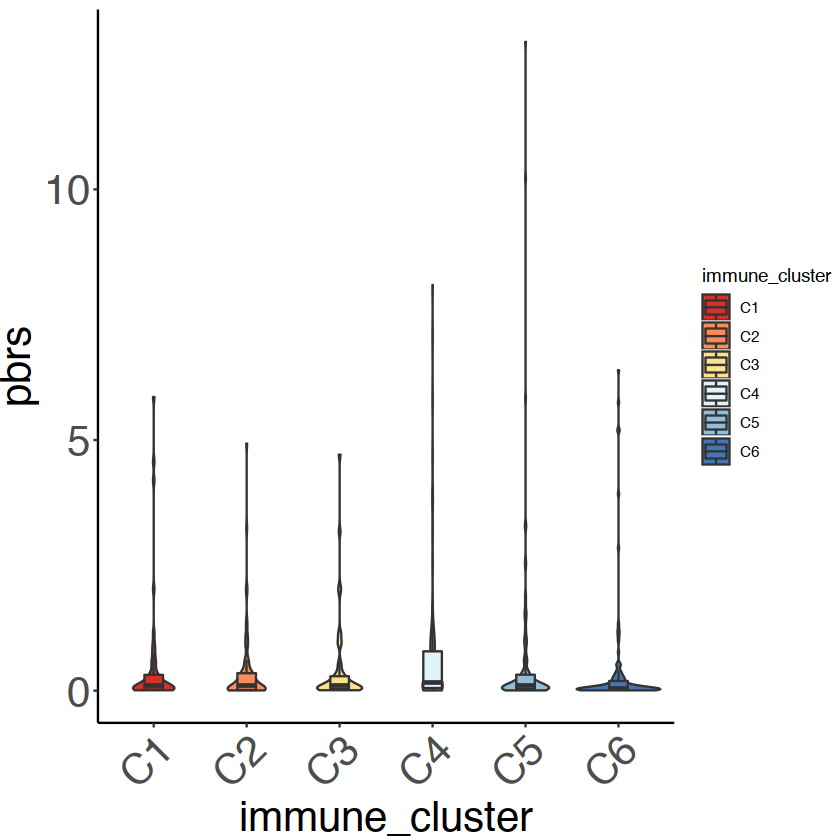

In [94]:
pbrplot <- ggplot(data = metadata_IC_subset_pbr, aes(x = immune_cluster, y = pbrs, fill = immune_cluster)) + 
geom_violin() + geom_boxplot(width = 0.2, outlier.colour = NA) + myaxis + myplot +
scale_fill_manual(values = Clustercolors) 
pbrplot

In [62]:
Listofpatients <- list()

for(p in unique(all.mupexi$sample_id)){
    mysample <- all.mupexi[ all.mupexi$sample_id == p,]
    
    genemat <- matrix(nrow = length(unique(mysample$Gene_Symbol)), 
                  ncol = length(unique(mysample$Amino_Acid_Change)),
                  dimnames = list(
                  unique(mysample$Gene_Symbol),
                  unique(mysample$Amino_Acid_Change)))
    
    for(r in colnames(genemat)){
        
    myres <- mysample[ mysample$Amino_Acid_Change == r,]
    for(g in unique(myres$Gene_Symbol)){
        myresmygen <- myres[ myres$Gene_Symbol == g,]
        summarytab <- tapply(myresmygen$Mut_MHCrank_BA, myresmygen$HLA_allele,summary)
        BestRank <- min(unlist(summarytab))
        genemat[g,r] <- BestRank
    }  
}
    Listofpatients[length(Listofpatients) + 1] <- list(genemat)

}

names(Listofpatients) <- unique(all.mupexi$sample_id)

In [63]:
save(Listofpatients, file = paste0(datapath, "Mupexi/Listofpatients.RData"))